
(process:24980): GLib-GIO-WARNING **: 19:54:40.476: Unexpectedly, UWP app `Evernote.Evernote_10.32.4.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


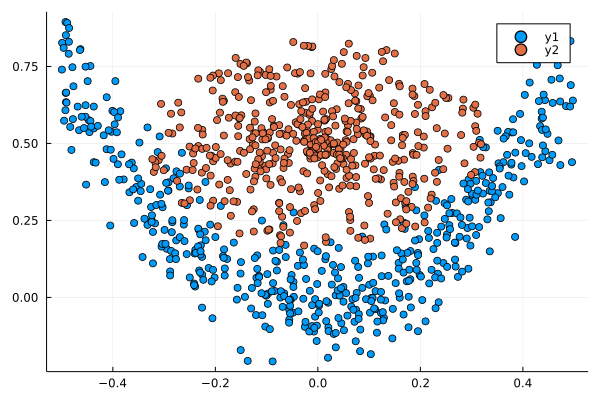

In [1]:
using Plots
using Statistics
 #Auxiliary functions for generating our data
function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end
function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end
# Creating our data
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)

# Visualizing
scatter(real[1,1:500],real[2,1:500])
scatter!(fake[1,1:500],fake[2,1:500])

In [ ]:
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

In [ ]:
# Organizing the data in batches
X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);
# Defining our model, optimization algorithm and loss function
m    = NeuralNetwork()
opt = Descent(0.05)
loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))